# CS 210 Recitation 11

## DECISON TREES

**Decision Trees** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple *decision rules* inferred from the data features.

*SKLearn* provides a classifier named **DecisionTreeClassifier** which can perform multi-class classification by  taking as input two arrays: An array X of size [*n_samples, n_features*] holding the training samples; and an array Y of integer values, size [*n_samples*], holding the class labels for the training samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [3]:
clf.predict([[2., 2.]])

array([1])

In [4]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

### Classifying the famous Iris dataset & visualizing the resulting the decision tree

In [5]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [6]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Via the command line, install *graphviz*:

$ **sudo apt install graphviz**

Then create a *PDF* file from the *DOT* file by:

$ **dot -Tpdf iris.dot -o iris.pdf**

You can also create the visualization as a picture in *PNG* format file like:

$ **dot -Tpng iris.dot -o iris.png**



Alternative to the command line operations, if we have Python module **pydotplus** installed, we can generate a PDF or PNG file directly in Python, using *conda install* for global installation:

$ **conda install -c conda-forge pydotplus**

OR, employing pip, you can install pydotplus for each Anaconda environment instance seperately:

$ **pip install pydotplus**

In [7]:
with open("iris.dot", 'w') as f:
...     f = tree.export_graphviz(clf, out_file=f)

In [8]:
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("iris2.pdf")


True

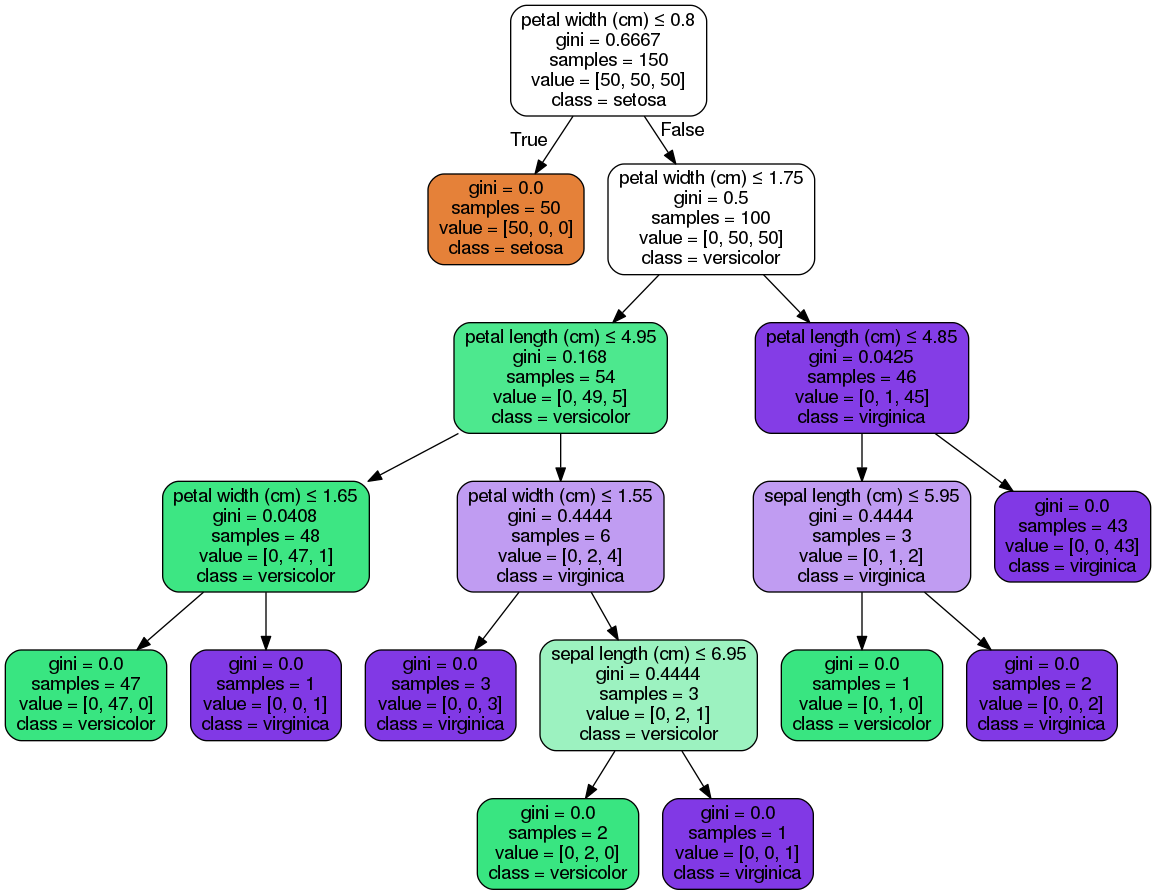

In [9]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  
                         class_names=iris.target_names, filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [10]:
clf.predict(iris.data[:1, :])

array([0])

In [11]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

### Plot the decision surface of the decision tree for the Iris dataset

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

In [12]:
iris.data[:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [16]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

In [17]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]): print(pairidx, pair)

0 [0, 1]
1 [0, 2]
2 [0, 3]
3 [1, 2]
4 [1, 3]
5 [2, 3]


In [18]:
X = iris.data[:, pair[0]]
X

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4,  4.7,  4.5,  4.9,  4. ,  4.6,
        4.5,  4.7,  3.3,  4.6,  3.9,  3.5,  4.2,  4. ,  4.7,  3.6,  4.4,
        4.5,  4.1,  4.5,  3.9,  4.8,  4. ,  4.9,  4.7,  4.3,  4.4,  4.8,
        5. ,  4.5,  3.5,  3.8,  3.7,  3.9,  5.1,  4.5,  4.5,  4.7,  4.4,
        4.1,  4. ,  4.4,  4.6,  4. ,  3.3,  4.2,  4.2,  4.2,  4.3,  3. ,
        4.1,  6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,
        5.1,  5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,
        4.9,  6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,
        5.6,  5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,
        5.9,  5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

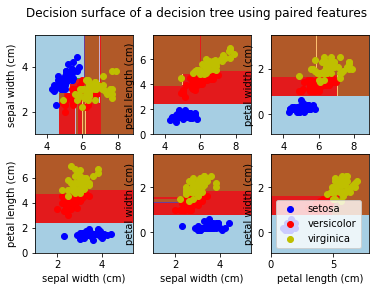

In [19]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Below is the enlarged image of the plot generated from above, replicated for clarity:

![alt text](./IrisDecisionBoundaries.png "Pairwise Decision Boundaries for Iris Dataset")

### Regression using decision trees

In [21]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

Let us employ decision tree techniques to fit a sine curve where observations have an additive noise component. Our decision tree can learn local linear regressions in order to approximate the sine-like curve.

We experiment to see that, if the maximum depth of the tree controlled by the *max_depth parameter* is set too high, the decision tree classifier learns ungeneralizable fine details of the training data including the noise component, leading to an overfit.

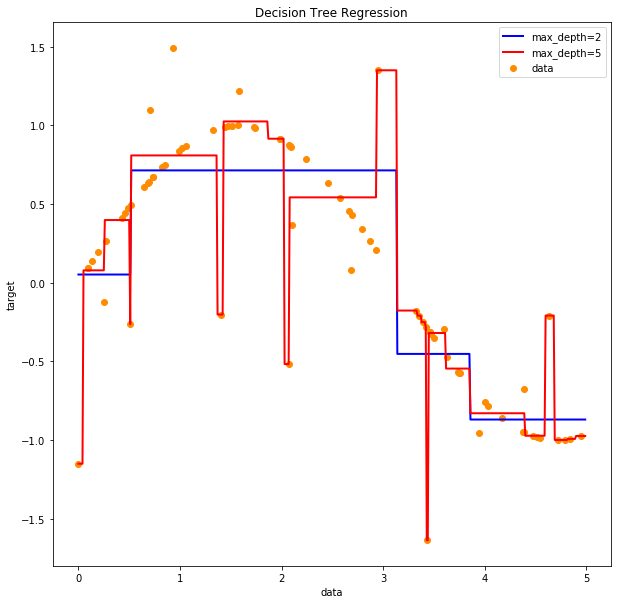

In [26]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
fig = plt.figure(figsize=(10,10))
#plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="blue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="red", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Conclusions

#### Some advantages of decision trees are:

DTs are **simple to understand and to interpret**. Trees can be visualised so the criteria can be conveyed to other humans, unlike many for machine learning algorithms. Since DTs use a *white box* model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a *black box* model (e.g., in an artificial neural network), results may be inexplainable: "The computer did it!"

They require **little data preparation**. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.

The **cost** of using the tree (i.e., predicting data) is **logarithmic** in the number of data points used to train the tree.

DTs can handle both **numerical** and **categorical** data. Other techniques are usually specialised in analysing datasets that have only one type of variable. DTs can also handle multi-output problems, unlike logistic regression, for example.

It is possible to **validate** a model using **statistical tests**. That makes it possible to account for the reliability of the model.



#### The disadvantages of decision trees include:

Decision-tree learners can easily create **over-complex trees** that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees **can be unstable** because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an **ensemble**.

The problem of learning an optimal decision tree is known to be **NP-complete** under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are **based on heuristic algorithms** such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by **training multiple trees in an ensemble learner**, where the features and samples are randomly sampled with replacement.

There are **concepts that are hard to learn** because decision trees can not express them easily, such as XOR, parity or multiplexer problems.

Decision tree learners create **biased trees** if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.